# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rahmad Noor Ikhsan
- **Email:** rajaikhsan2021@gmail.com
- **ID Dicoding:** rahma-d

## Menentukan Pertanyaan Bisnis

- Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit tersewa?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda pada setiap musim?
- Seberapa besar proporsi customer registered dibandingkan dengan casual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import zipfile

## Data Wrangling

### Gathering Data

Download dataset from kaggle

In [2]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Extract file zip hasil download

In [3]:
zip_ref = zipfile.ZipFile('bike-sharing-dataset.zip', 'r')
zip_ref.extractall('datasets/')
zip_ref.close()

## Load data day

In [4]:
day_df = pd.read_csv('datasets/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Load data hour

In [5]:
hour_df = pd.read_csv('datasets/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **instant**: Indeks rekaman.
- **dteday**: Tanggal.
- **season**: Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).
- **yr**: Tahun (0: 2011, 1: 2012).
- **mnth**: Bulan (1 hingga 12).
- **hr**: Jam (0 hingga 23).
- **holiday**: Apakah hari tersebut adalah hari libur atau bukan.
- **weekday**: Hari dalam minggu.
- **workingday**: Jika hari tersebut bukan akhir pekan maupun hari libur, nilainya 1; jika tidak, 0.
- **weathersit**: Situasi cuaca:

  1: Cerah, Sedikit berawan, Sebagian berawan.

  2: Kabut + Berawan, Kabut + Awan terputus, Kabut + Sedikit awan.

  3: Salju ringan, Hujan ringan + Badai petir + Awan tersebar.

  4: Hujan deras + Butiran es + Badai petir + Kabut, Salju + Kabut.

- **temp**: Suhu yang dinormalisasi dalam Celsius. Nilainya diperoleh melalui (t - t_min) / (t_max - t_min), dengan t_min = -8°C dan t_max = 39°C (hanya pada skala per jam).
- **atemp**: Suhu yang dirasakan yang dinormalisasi dalam Celsius. Nilainya diperoleh melalui (t - t_min) / (t_max - t_min), dengan t_min = -16°C dan t_max = 50°C (hanya pada skala per jam).
- **hum**: Kelembapan yang dinormalisasi. Nilainya dibagi dengan 100 (maksimum).
- **windspeed**: Kecepatan angin yang dinormalisasi. Nilainya dibagi dengan 67 (maksimum).
- **casual**: Jumlah pengguna kasual.
- **registered**: Jumlah pengguna terdaftar.
- **cnt**: Jumlah total sepeda yang disewa, termasuk pengguna kasual dan terdaftar.

### Assessing Data

### Menilai tabel `day_df`

Melihat info pada tabel seperti jumlah data, dan tipe data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat data yang bernilai null

In [7]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Melihat data duplikat

In [8]:
print('Jumlah data duplikat:', day_df.duplicated().sum())

Jumlah data duplikat: 0


Melihat ringkasan parameter statistik dari kolom numerik

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel `hour_df`

Melihat info pada tabel seperti jumlah data, dan tipe data

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat data yang bernilai null

In [11]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Melihat data duplikat

In [12]:
print('Jumlah data duplikat:', hour_df.duplicated().sum())

Jumlah data duplikat: 0


Melihat ringkasan parameter statistik dari kolom numerik

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data pada kedua tabel pada kolom **dteday** yang seharusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**.
- Pada kolom **season**, **yr**, **mnth**, **holiday**, **weekday**, **weathersit** masih berbentuk **numerik**, agar lebih mudah dibaca kita perlu mengubah menjadi **categorical**.
- Nama kolom **dteday**, **yr**, **mnth**, **hum**, **weathersit**, **cnt** & **hr** pada tabel **hour_df** masih terlalu sulit untuk dibaca, sehingga perlu mengubah nama kolom tersebut agar lebih mudah untuk dibaca.
- Pada kedua tabel **tidak ada** kolom yang memiliki **missing value**, **duplikat**, dan **keanehan pada nilai ringkasan statistik dari kolom numerik**.
- Terdapat kolom yang tidak dibutuhkan, yaitu instant karena tidak memberikan informasi yang bermanfaat.

### Cleaning Data

Karena pada kedua tabel yaitu `day_df` dan `hour_df` memiliki kolom yang sama, sehingga kita dapat membersihkan data secara langsung tanpa perlu terpisah satu persatu

### Dropping

Karena terdapat kolom instant yang tidak memberikan informasi yang dibutuhkan, kita akan menghapus kolom tersebut

In [14]:
for df in (hour_df, day_df):
  df.drop(columns=['instant'], inplace=True)

Bisa kita pastikan dengan melihat info kolom pada kedua tabel

In [15]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null

Okay, kolom instant di kedua tabel sudah terhapus

### Mengubah tipe data

Karena kolom **dteday** memiliki tipe data yang belum sesuai, yaitu **object**. Maka akan kita ganti dengan **datetime**

In [16]:
for df in (day_df, hour_df):
    df['dteday'] = pd.to_datetime(df['dteday'])

Kemudian untuk kolom **season**, **mnth**, **holiday**, **weekday**, **weathersit** akan kita ubah menjadi **categorical** agar mudah dibaca. Maka kita perlu mengubah tipe data dari **int** menjadi **category**

In [17]:
numeric_columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in numeric_columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

Setelah mengubah tipe data mari kita coba cek apakah tipe data nya sudah sesuai dengan yang diharapkan atau belum

In [18]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

Setelah kita cek ternyata tipe data pada kedua tabel **sudah sesuai** dengan yang kita harapkan sehingga kita bisa melanjutkan proses Cleaning Data

### Mengubah nama kolom

Pada tahap ini kita akan mengubah nama-nama kolom (**dteday**, **yr**, **mnth**, **hum**, **weathersit**, **cnt** & **hr** pada tabel **hour_df**) yang masih sulit dibaca agar lebih mudah dibaca oleh audiens

In [19]:
rename_columns = {
    'dteday': 'date_day',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count_rental',
    'hum': 'humidity'
}

hour_rename = {'hr': 'hour'}

for df in (day_df, hour_df):
    df.rename(columns={**rename_columns, **(hour_rename if df is hour_df else {})}, inplace=True)

Setelah itu, bisa kita lihat apakah nama-nama kolom sudah sesuai dengan apa yang kita harapkan agar lebih mudah dibaca

In [20]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_day           731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    int64         
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    int64         
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  windspeed          731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count_rent

Akhirnya nama-nama kolom pada kedua tabel sudah dapat dibaca dengan mudah, sehingga kita bisa melanjutkan tahap selanjutnya yaitu mengubah nilai numerik menjadi categorical agar nilai dapat mudah dibaca

### Mengubah nilai numerical menjadi categorical

Terdapat beberapa nilai yang perlu kita ubah agar lebih mudah untuk dibaca diantara :

- season = 1: Spring, 2: Summer, 3: Fall, 4: Winter
- month = 1: Jan, 2: Feb, 3: Mar, 4: Apr, 5: May, 6: Jun, 7: Jul, 8: Aug, 9: Sep, 10: Oct, 11: Nov, 12: Dec
- weather_situation = 1: Clear, Misty, Light Rain, Heavy Rain
- weekday = 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
- year = 0:2011, 1:2012

Mengubah nilai pada season

In [21]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

for df in (day_df, hour_df):
    df.season = df.season.cat.rename_categories(season_mapping)

Mengubah nilai pada month

In [22]:
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

for df in (day_df, hour_df):
    df.month = df.month.cat.rename_categories(month_mapping)

Mengubah nilai pada weather_situation

In [23]:
weather_mapping = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

for df in (day_df, hour_df):
    df.weather_situation = df.weather_situation.cat.rename_categories(weather_mapping)

Mengubah nilai pada weekday

In [24]:
weekday_mapping = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
}

for df in (day_df, hour_df):
    df.weekday = df.weekday.cat.rename_categories(weekday_mapping)

Mengubah nilai year

In [25]:
year_mapping = {0: 2011, 1: 2012}

for df in (day_df, hour_df):
  df.year = df.year.replace(year_mapping)

Setelah selesai mengubah nilai pada beberapa kolom, kita bisa cek nilainya apakah sudah sesuai seperti yang kita harapkan

In [26]:
day_df.head(5)

,date_day,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hour_df.head(5)

,date_day,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental
0,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kolom instant telah dihapus, karena tidak memberikan informasi yang berguna.
- Kolom dteday pada kedua tabel telah dikonversi menjadi datetime.
- Nama kolom telah diperbarui agar lebih deskriptif dan mudah dipahami.
- Nilai dalam beberapa kolom telah dikonversi agar lebih intuitif bagi pengguna.

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data hour_df terlebih dahulu

In [28]:
hour_df.describe(include="all")

,date_day,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental
count,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,May,NaN,0.0,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman parameter statistik di atas, jumlah transaksi penyewaan sepeda tercatat sebanyak 17.379 kali. Waktu penyewaan sepeda berkisar antara pukul 00.00 hingga 23.00, dengan rata-rata transaksi terjadi pada pukul 11.54 dan standar deviasi sebesar 6.91. Musim dengan jumlah penyewaan tertinggi adalah Fall dengan 4.496 transaksi, sedangkan kondisi cuaca yang paling mendominasi saat penyewaan adalah cuaca cerah (Clear) sebanyak 11.413 kali.

Sekarang mari kita lihat jumlah penyewaan sepeda berdasarkan jam

In [29]:
hour_df.groupby("hour").agg({
    "count_rental": "sum"
})

,count_rental
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Berdasarkan pivot tabel diatas, dapat diketahui jumlah penyewaan tertinggi terjadi pada pukul 17.00 dengan total 336.860 transaksi, yang kemungkinan besar bertepatan dengan jam pulang kerja. Sebaliknya, penyewaan terendah terjadi pada pukul 4.00 dengan hanya 4.428 transaksi, yang dapat dikaitkan dengan waktu dini hari ketika aktivitas pengguna cenderung rendah. Secara umum, penyewaan sepeda cenderung meningkat pada pagi hari dan mencapai puncaknya di sore hari sebelum menurun kembali di malam hari.

Selanjutnya kita akan melihat jumlah penyewaan sepeda berdasarkan cuaca

In [30]:
hour_df.groupby(by="weather_situation", observed=True).count_rental.sum().sort_values(ascending=False)

,count_rental
weather_situation,
Clear,2338173
Misty,795952
Light Rain,158331
Heavy Rain,223


Berdasarkan data penyewaan sepeda berdasarkan kondisi cuaca, jumlah penyewaan tertinggi terjadi saat cuaca cerah dengan total 2.338.173 transaksi. Sementara itu, jumlah penyewaan terendah terjadi saat hujan lebat dengan hanya 223 transaksi. Hal ini menunjukkan bahwa cuaca sangat berpengaruh terhadap tingkat penyewaan sepeda, di mana kondisi cerah mendorong lebih banyak pengguna, sedangkan hujan lebat menyebabkan penurunan drastis dalam penyewaan.

### Explore `day_df`

Seperti biasa, untuk permulaan kita akan melihat rangkuman parameter statistik dari data day_df

In [31]:
day_df.describe(include="all")

,date_day,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental
count,731,731,731.000000,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,Jan,0.0,Sun,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik di atas, data mencakup 731 hari dengan jumlah penyewaan sepeda yang bervariasi antara 22 hingga 8.714 unit per hari, dengan rata-rata 4.504 unit dan standar deviasi 1.937 unit. Sebagian besar data tercatat pada musim gugur, menunjukkan tren musiman dalam penggunaan sepeda. Selain itu, sekitar 68,4% dari total hari merupakan hari kerja, yang mengindikasikan bahwa penyewaan sepeda lebih banyak dilakukan pada hari kerja dibandingkan hari libur.

Sekarang mari kita lihat jumlah penyewaan sepeda berdasarkan musim

In [32]:
day_df.groupby(by="season", observed=True).count_rental.sum().sort_values(ascending=False)

,count_rental
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


Berdasarkan data jumlah penyewaan sepeda berdasarkan musim, terlihat bahwa musim Fall memiliki jumlah penyewaan terbanyak dengan 1.061.129 penyewaan. Summer berada di posisi kedua dengan 918.589 penyewaan, diikuti oleh Winter dengan 841.613 penyewaan. Sementara itu, musim dengan jumlah penyewaan paling sedikit adalah Spring, yaitu 471.348 penyewaan. Hal ini menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada musim gugur dan musim panas, kemungkinan karena kondisi cuaca yang lebih nyaman dibandingkan musim semi atau musim dingin.

Sekarang mari kita lanjut untuk melihat jumlah penyewaan tiap tahun berdasarkan penyewa yang terdaftar dan tidak terdaftar

In [33]:
day_df.groupby("year").agg({
    "registered": "sum",
    "casual": "sum"
})

,registered,casual
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan data di atas, dapat diketahui bahwa jumlah penyewaan sepeda oleh pengguna registered jauh lebih tinggi dibandingkan dengan pengguna casual pada kedua tahun. Pada tahun 2011, terdapat 995.851 penyewaan oleh pengguna terdaftar (registered) dan 247.252 oleh pengguna tidak terdaftar (casual). Sementara itu, pada tahun 2012, jumlah penyewaan meningkat menjadi 1.676.811 untuk pengguna registered dan 372.765 untuk pengguna casual. Hal ini menunjukkan bahwa mayoritas pengguna lebih memilih untuk mendaftar sebagai pengguna tetap dibandingkan dengan menggunakan layanan penyewaan secara casual, serta adanya peningkatan signifikan dalam jumlah penyewaan dari tahun 2011 ke 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit tersewa?

Langkah pertama kita akan melakukan groupping jam (hour) dengan total rental(count) terlebih dahulu

In [34]:
sum_hour_count_df = hour_df.groupby("hour").count_rental.sum().sort_values(ascending=False).reset_index()

Selanjutnya kita akan membuat visualisasi menggunakan bar chart

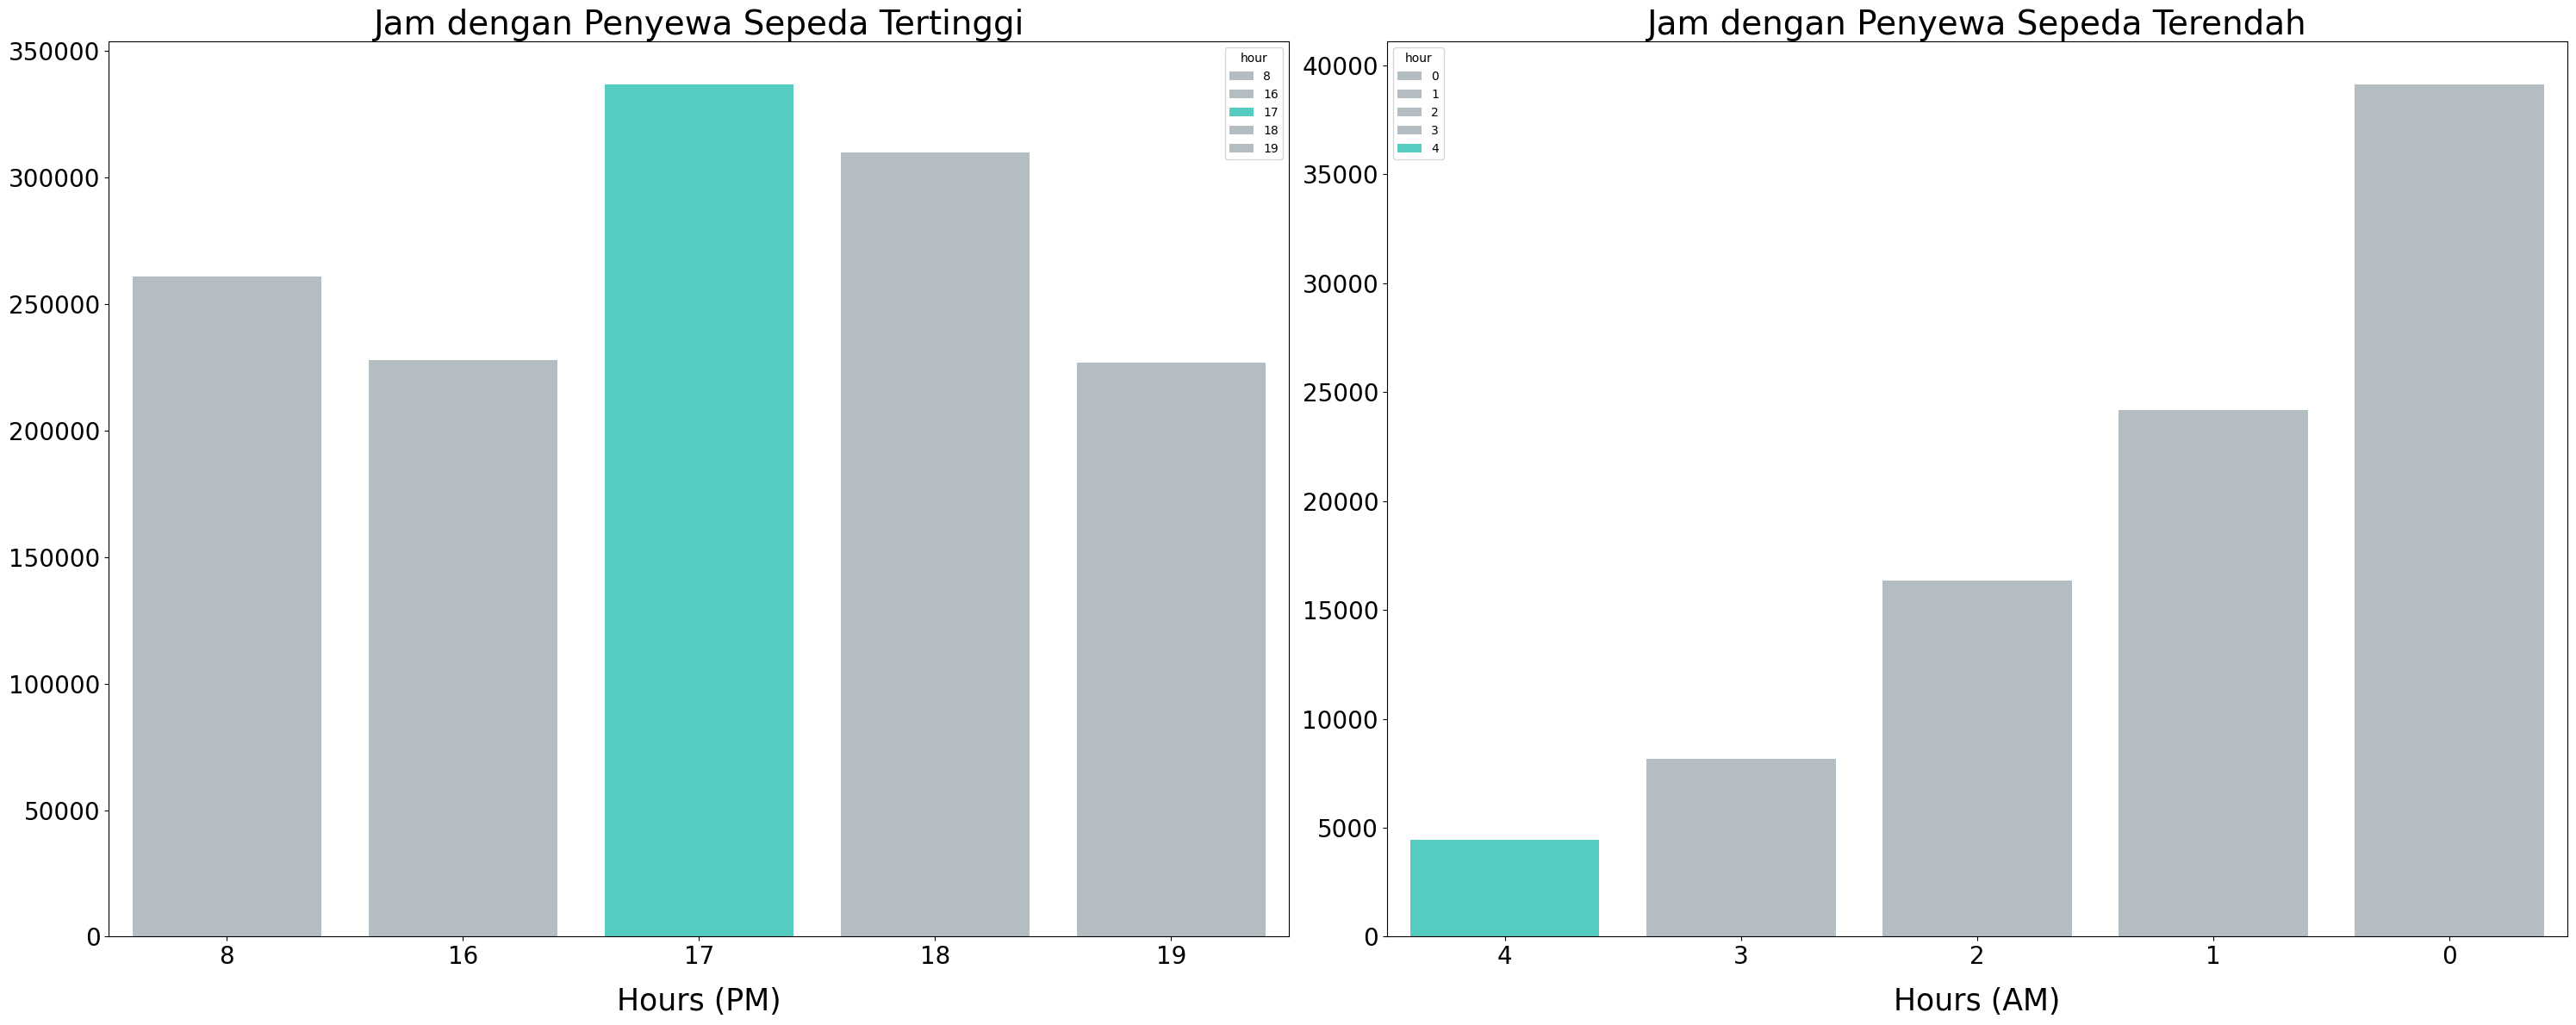

In [35]:
# Membuat figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 12))

# Warna untuk plot
highlight_color = "#40E0D0"
base_color = "#B0BEC5"
palette_top = [base_color, base_color, highlight_color, base_color, base_color]
palette_bottom = [base_color, base_color, base_color, base_color, highlight_color]

# Plot untuk jam dengan penyewa sepeda tertinggi
sns.barplot(
    x="hour",
    y="count_rental",
    data=sum_hour_count_df.head(5),
    hue="hour",
    palette=palette_top,
    ax=ax[0]
)
ax[0].set_xlabel("Hours (PM)", fontsize=25, labelpad=15)
ax[0].set_ylabel(None)
ax[0].set_title("Jam dengan Penyewa Sepeda Tertinggi", fontsize=28)
ax[0].tick_params(axis="x", labelsize=20)
ax[0].tick_params(axis="y", labelsize=20)

# Plot untuk jam dengan penyewa sepeda terendah
sns.barplot(
    x="hour",
    y="count_rental",
    data=sum_hour_count_df.sort_values(by="hour", ascending=True).head(5),
    hue="hour",
    palette=palette_bottom,
    ax=ax[1]
)
ax[1].set_xlabel("Hours (AM)", fontsize=25, labelpad=15)
ax[1].set_ylabel(None)
ax[1].set_title("Jam dengan Penyewa Sepeda Terendah", fontsize=28)
ax[1].tick_params(axis="x", labelsize=20)
ax[1].tick_params(axis="y", labelsize=20)
ax[1].invert_xaxis()

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas, penyewaan sepeda tertinggi terjadi pada jam 17:00, diikuti oleh jam 08:00, 16:00, 18:00, dan 19:00, yang kemungkinan besar berkaitan dengan jam berangkat dan pulang kerja. Sebaliknya, penyewaan terendah terjadi pada jam 04:00, serta pada rentang 00:00 hingga 03:00, saat aktivitas masyarakat minim. Pola ini menunjukkan bahwa penggunaan sepeda dipengaruhi oleh rutinitas harian

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

Agar mempermudah kita dalam menyampaikan informasi penyewaan berdasarkan cuaca, kita akan membuat visualisasi data dalam bentuk bar chart

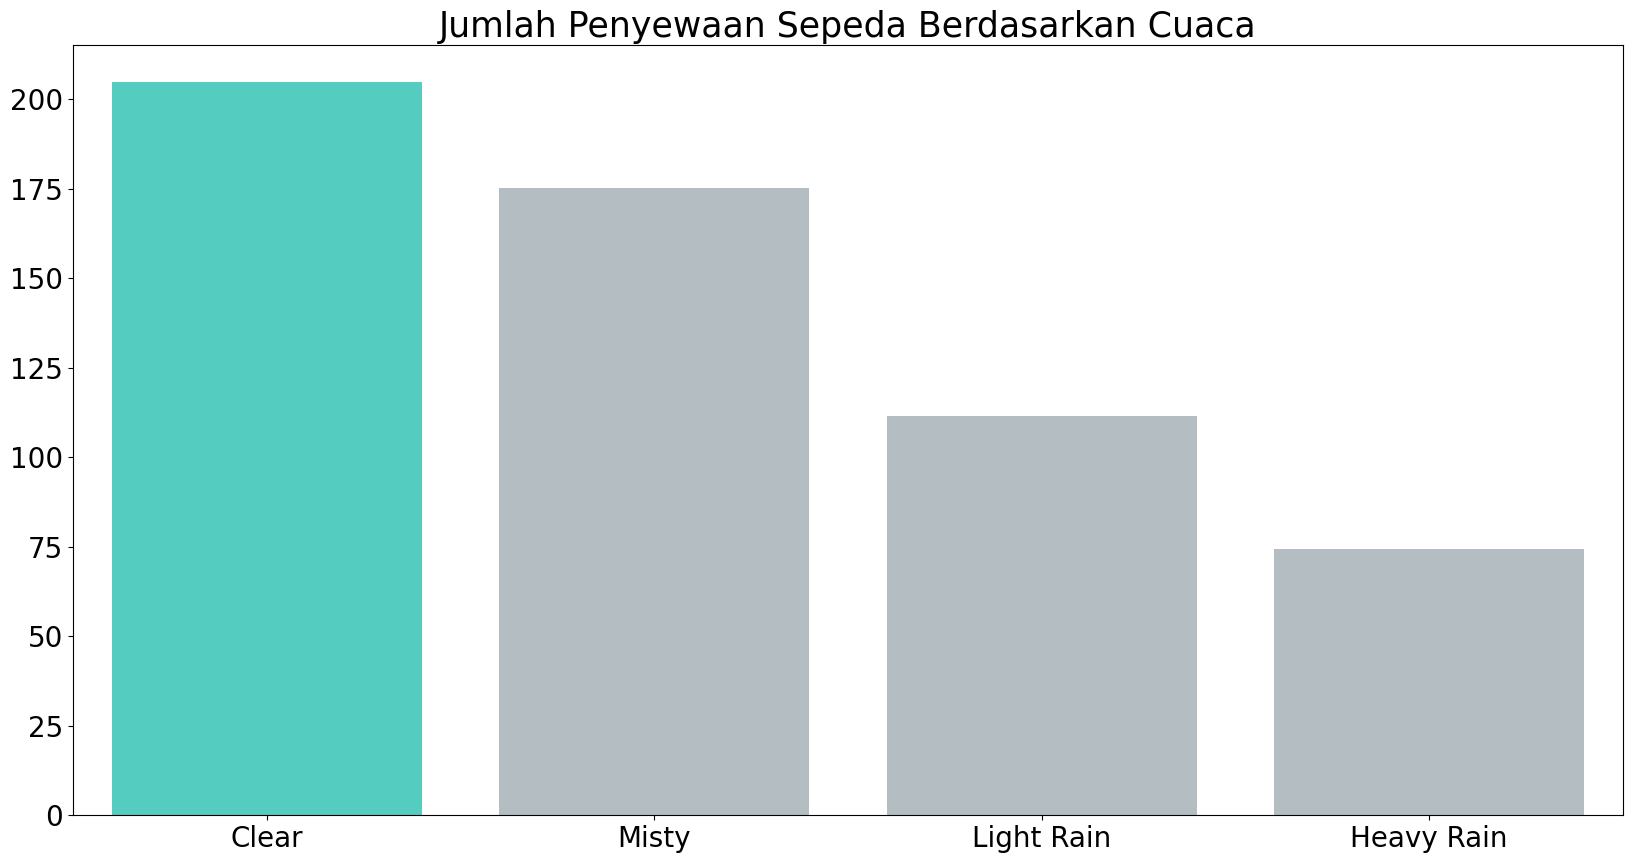

In [36]:
# Membuat figure
fig, ax = plt.subplots(figsize=(20, 10))

# Warna untuk plot
highlight_color = "#40E0D0"
base_color = "#B0BEC5"
palette_plot = [highlight_color, base_color, base_color, base_color]

# Membuat barplot
sns.barplot(
    y="count_rental",
    x="weather_situation",
    data=hour_df.sort_values(by="weather_situation", ascending=False),
    hue="weather_situation",
    palette=palette_plot,
    ax=ax,
    errorbar=None
)

# Mengatur judul, label, dan tampilan grafik
ax.set_title("Jumlah Penyewaan Sepeda Berdasarkan Cuaca", fontsize=25)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Menampilkan plot
plt.show()

Berdasarkan visualisasi di atas, jumlah penyewaan sepeda tertinggi terjadi saat kondisi cuaca cerah (Clear), yang menunjukkan bahwa pengguna lebih cenderung menyewa sepeda dalam kondisi cuaca yang baik. Sementara itu, jumlah penyewaan menurun seiring dengan memburuknya kondisi cuaca, di mana kondisi Misty masih memiliki jumlah penyewaan yang cukup tinggi, tetapi mulai berkurang saat terjadi hujan ringan (Light Rain). Penyewaan sepeda paling sedikit terjadi saat hujan lebat (Heavy Rain), yang kemungkinan besar disebabkan oleh faktor keselamatan dan kenyamanan pengguna. Hal ini menunjukkan bahwa cuaca memiliki pengaruh signifikan terhadap tingkat penyewaan sepeda.

### Pertanyaan 3: Bagaimana pola penyewaan sepeda pada setiap musim?

Kita akan

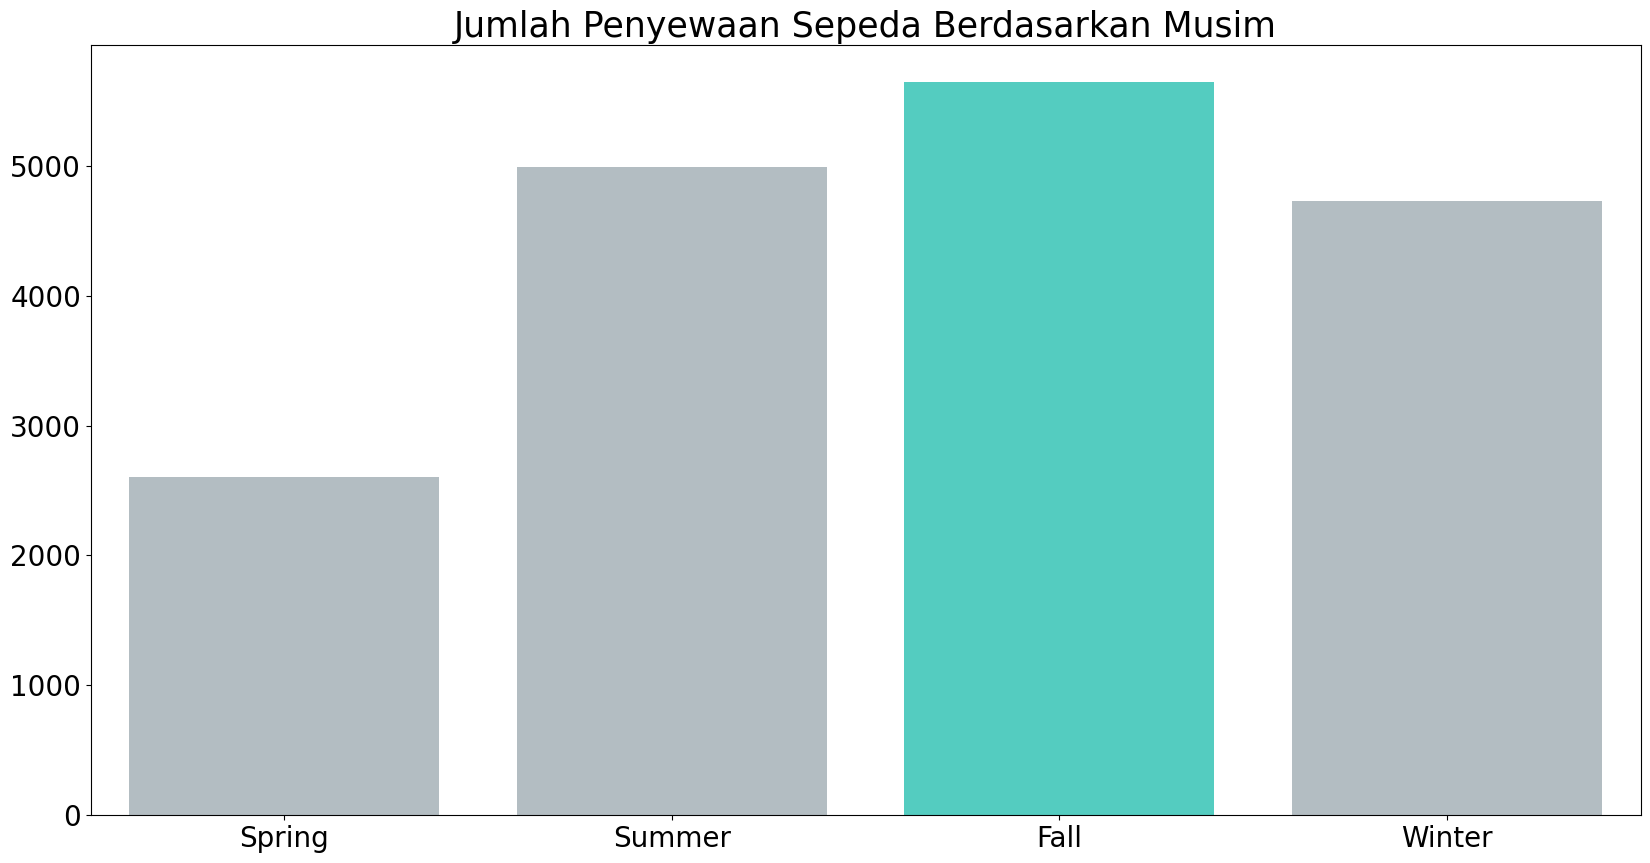

In [37]:
# Membuat figure
fig, ax = plt.subplots(figsize=(20, 10))

# Warna untuk plot
highlight_color = "#40E0D0"
base_color = "#B0BEC5"
palette_colors = [base_color, base_color, highlight_color, base_color]

# Membuat barplot
sns.barplot(
    y="count_rental",
    x="season",
    data=day_df,
    palette=palette_colors,
    hue="season",
    ax=ax,
    errorbar=None
)

# Mengatur judul, label, dan tampilan grafik
ax.set_title("Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=25, loc="center")
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Menampilkan plot
plt.show()

Berdasarkan visualisasi diatas, pola penyewaan sepeda menunjukkan bahwa musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi dibandingkan musim lainnya. Musim panas (Summer) berada di posisi kedua, diikuti oleh musim dingin (Winter), sedangkan musim semi (Spring) memiliki jumlah penyewaan paling rendah. Hal ini mengindikasikan bahwa pengguna lebih cenderung menyewa sepeda pada musim gugur dan musim panas, kemungkinan karena kondisi cuaca yang lebih nyaman dibandingkan musim dingin atau musim semi.

### Pertanyaan 4: Seberapa besar proporsi customer registered dibandingkan dengan casual?

Karena hanya terdapat 2 customer yaitu registered dan casual, maka kita bisa menggunakan Pie chart agar lebih mudah untuk menyampaikan informasi

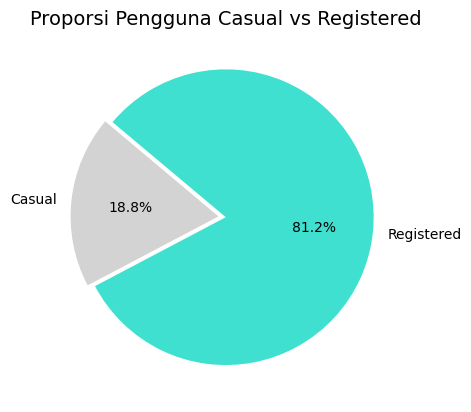

In [38]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df.casual)

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df.registered)

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
colors = ["#D3D3D3", "#40E0D0"]

# Membuat pie plot
plt.pie(
    data,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=(0.05, 0)
)

# Menambahkan judul
plt.title("Proporsi Pengguna Casual vs Registered", fontsize=14)

# Menampilkan pie plot
plt.show()

Berdasarkan data yang ditampilkan dalam diagram pie, proporsi customer registered jauh lebih besar dibandingkan dengan customer casual, yaitu 81.2% berbanding 18.8%, yang berarti jumlah pengguna registered hampir 4,3 kali lipat lebih banyak. Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih mendaftar sebagai pengguna registered, kemungkinan karena keuntungan seperti harga lebih ekonomis atau kemudahan akses. Dengan dominasi pelanggan registered, bisnis penyewaan sepeda memiliki basis pelanggan loyal yang kuat, namun masih terdapat peluang untuk meningkatkan jumlah pengguna casual dengan menawarkan promo khusus atau diskon bagi pengguna baru agar tertarik mencoba layanan.

## Analisis Lanjutan

### Clustering

Clustering berikut bertujuan untuk Menentukan kriteria pengelompokan berdasarkan musim (season), hari libur (holiday), cuaca(weather_situation), dan jam (hour)

In [39]:
# Menambahkan kolom 'time_of_day' berdasarkan kolom 'hour'
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Malam'
    else:
        return 'Dini Hari'

hour_df['time_of_day'] = hour_df['hour'].apply(categorize_hour)

# Mengubah 0 dan 1 pada kolom 'holiday' menjadi kategori yang lebih mudah dibaca
hour_df['holiday'] = hour_df['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

# Mengelompokkan data berdasarkan 'season', 'holiday', dan 'time_of_day'
grouped = hour_df.groupby(by=['season', 'holiday', 'weather_situation', 'time_of_day'], observed=False).agg({
    'count_rental': ['mean', 'median', 'std']
}).reset_index()

# Menampilkan hasil pengelompokan
print(grouped.head())

   season     holiday weather_situation time_of_day count_rental         \
                                                            mean median   
0  Spring  Hari Kerja             Clear   Dini Hari    13.759259    7.0   
1  Spring  Hari Kerja             Clear       Malam   130.928876   94.0   
2  Spring  Hari Kerja             Clear        Pagi   134.540193  100.5   
3  Spring  Hari Kerja             Clear       Siang   201.961948  172.0   
4  Spring  Hari Kerja             Misty   Dini Hari    15.241259    8.5   

               
          std  
0   17.171714  
1  119.950729  
2  122.478461  
3  133.567867  
4   17.059273  


Selanjutnya kita akan membuat visualisasi rata-rata peminjaman berdasarkan musim (Season)

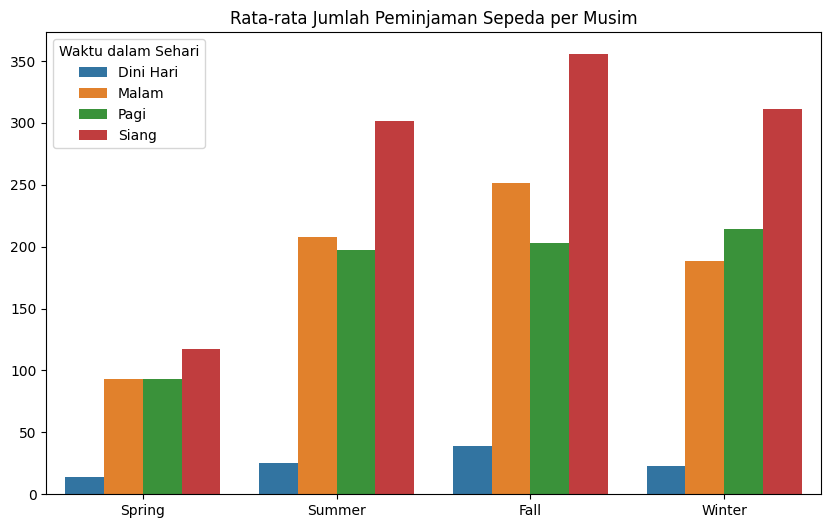

In [40]:
# Visualisasi jumlah peminjaman rata-rata berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='season', y=('count_rental', 'mean'), hue='time_of_day', errorbar=None)
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Musim')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='Waktu dalam Sehari')
plt.show()

Dari hasil visualisasi, terlihat bahwa jumlah peminjaman sepeda paling tinggi terjadi pada siang hari di semua musim, terutama saat musim gugur (Fall). Sementara itu, peminjaman pada dini hari cenderung paling rendah di setiap musim. Peminjaman sepeda meningkat secara signifikan dari musim semi (Spring) ke musim panas (Summer) dan mencapai puncaknya di musim gugur (Fall), sebelum menurun kembali di musim dingin (Winter). Pola ini menunjukkan bahwa faktor musim dan waktu dalam sehari memengaruhi tingkat penggunaan sepeda, dengan aktivitas tertinggi terjadi pada siang hari, terutama saat cuaca lebih hangat.

Selanjutnya kita akan membuat visualisasi rata-rata peminjaman berdasarkan cuaca

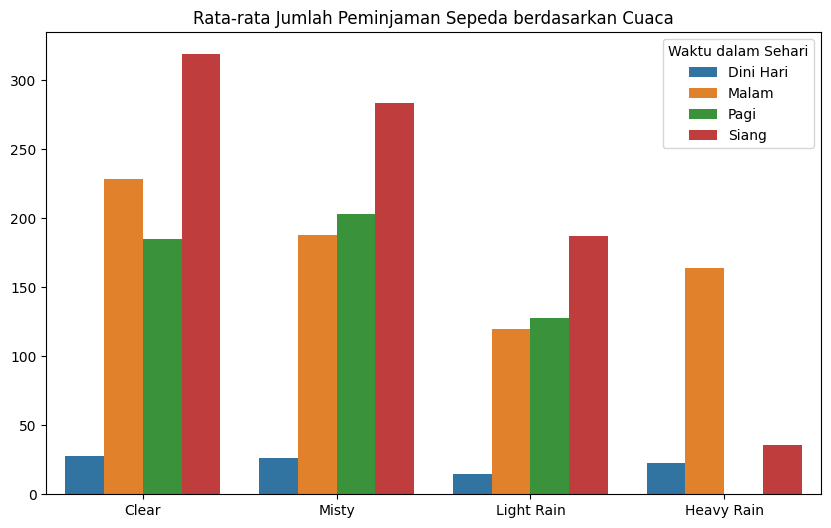

In [41]:
# Visualisasi jumlah peminjaman rata-rata berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='weather_situation', y=('count_rental', 'mean'), hue='time_of_day', errorbar=None)
plt.title('Rata-rata Jumlah Peminjaman Sepeda berdasarkan Cuaca')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='Waktu dalam Sehari')
plt.show()

Dari hasil visualisasi, terlihat bahwa jumlah peminjaman sepeda paling tinggi terjadi saat cuaca cerah (Clear), terutama pada siang hari. Ketika kondisi berubah menjadi berkabut (Misty) atau hujan ringan (Light Rain), jumlah peminjaman mulai menurun secara bertahap. Pada kondisi hujan lebat (Heavy Rain), jumlah peminjaman sepeda turun drastis, terutama pada siang hari, menunjukkan bahwa cuaca buruk sangat mempengaruhi minat pengguna dalam menggunakan sepeda. Secara keseluruhan, semakin buruk kondisi cuaca, semakin sedikit jumlah peminjaman sepeda, terutama pada waktu siang dan malam hari.

Selanjutnya kita akan membuat visualisasi rata-rata peminjaman berdasarkan hari kerja dan hari libur

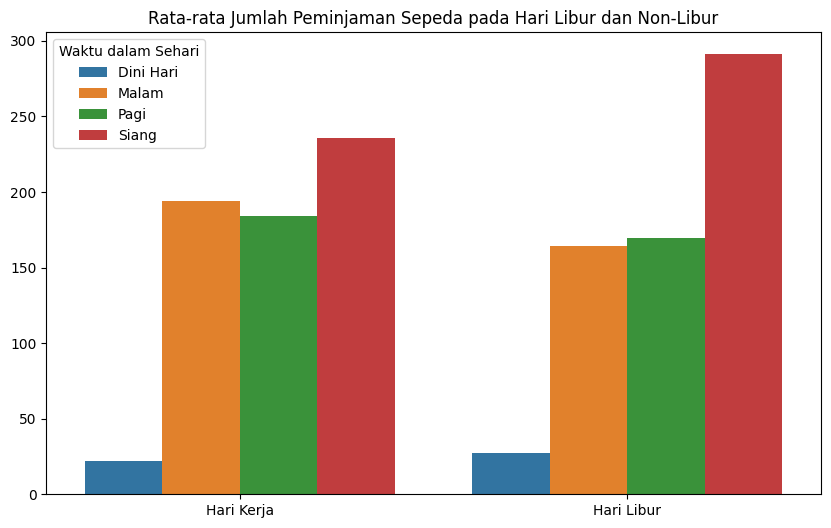

In [42]:
# Visualisasi jumlah peminjaman rata-rata pada hari libur dan non-libur
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='holiday', y=('count_rental', 'mean'), hue='time_of_day', errorbar=None)
plt.title('Rata-rata Jumlah Peminjaman Sepeda pada Hari Libur dan Non-Libur')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='Waktu dalam Sehari')
plt.show()

Dari hasil visualisasi, dapat disimpulkan bahwa jumlah peminjaman sepeda pada siang hari tetap menjadi yang tertinggi, baik pada hari kerja maupun hari libur. Sementara itu, jumlah peminjaman pada dini hari tetap yang paling rendah tanpa perbedaan signifikan antara hari kerja dan hari libur. Hal ini menunjukkan bahwa pengguna lebih cenderung memanfaatkan waktu siang hari untuk bersepeda

## Conclusion

- Conclution pertanyaan 1 : Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit tersewa?

  Penyewaan sepeda paling banyak terjadi pada pukul 17:00, sedangkan paling sedikit pada 04:00 dan rentang 00:00-03:00, menunjukkan pola yang dipengaruhi oleh aktivitas harian.
- Conclution pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

  Penyewaan tertinggi terjadi saat cuaca cerah, sementara hujan lebat menyebabkan penurunan signifikan, menunjukkan bahwa cuaca sangat memengaruhi jumlah penyewaan.

- Conclution Pertanyaan 3 : Bagaimana pola penyewaan sepeda pada setiap musim?

  Musim gugur memiliki penyewaan tertinggi, diikuti oleh musim panas, sedangkan musim semi memiliki penyewaan terendah, menunjukkan preferensi pengguna terhadap cuaca yang lebih nyaman.

- Conclution Pertanyaan 4 : Seberapa besar proporsi customer registered dibandingkan dengan casual?

  Proporsi pengguna registered (81.2%) jauh lebih besar dibandingkan casual (18.8%), menunjukkan loyalitas pelanggan tinggi, namun ada peluang meningkatkan pengguna casual dengan promo atau diskon.